In [1]:
%pylab inline 
import numpy as np 
import matplotlib.pyplot as plt
%precision 4 

Populating the interactive namespace from numpy and matplotlib


u'%.4f'

In [2]:
from math import sqrt, sinh, tanh, exp
from random import uniform as ran, gauss

In [3]:
def z(beta,k):
   sum = 1 / (1 - exp(-k*beta))**3
   return sum


def canonic_recursion(beta,N):
   Z = [1.]
   for M in range(1, N+1):
      Z.append( sum(Z[k] * z(beta,M-k) for k in range(M)) / M )
   return Z



def pi_list_make(Z,M):
   pi_list = [0] + [ z(beta,k)*Z[M-k]/Z[M]/M for k  in range(1,M+1) ]
   pi_sum = [0]
   for k in range(1, M+1):
      pi_sum.append(pi_sum[k-1] + pi_list[k])
   return pi_sum



def tower_sample(data,Upsilon): #naive tower sampling, cf. SMAC Sect. 1.2.3
   for k in range(len(data)):
      if Upsilon < data[k]: break
   return k



def levy_harmonic_path(Del_tau,N): #
   beta = N * Del_tau
   xN = gauss(0.,1./sqrt(2*tanh(beta/2.)))
   x = [xN]
   for k in range(1,N):
      Upsilon_1 = 1./tanh(Del_tau) + 1./tanh((N-k)*Del_tau)
      Upsilon_2 = x[k-1]/sinh(Del_tau) + xN/sinh((N-k)*Del_tau)
      x_mean = Upsilon_2 / Upsilon_1
      sigma = 1. / sqrt(Upsilon_1)
      x.append(gauss(x_mean,sigma))
   return x

In [18]:
N = 1024
T_star = .1
T = T_star * N**(1./3.)
beta = 1. / T
Z = canonic_recursion(beta,N)
M = N
x_config = []
y_config = []
while M > 0:
   pi_sum = pi_list_make(Z,M)
   Upsilon = ran(0,1)
   k = tower_sample(pi_sum,Upsilon)
   x_config += levy_harmonic_path(beta,k)
   y_config += levy_harmonic_path(beta,k)
   M -= k

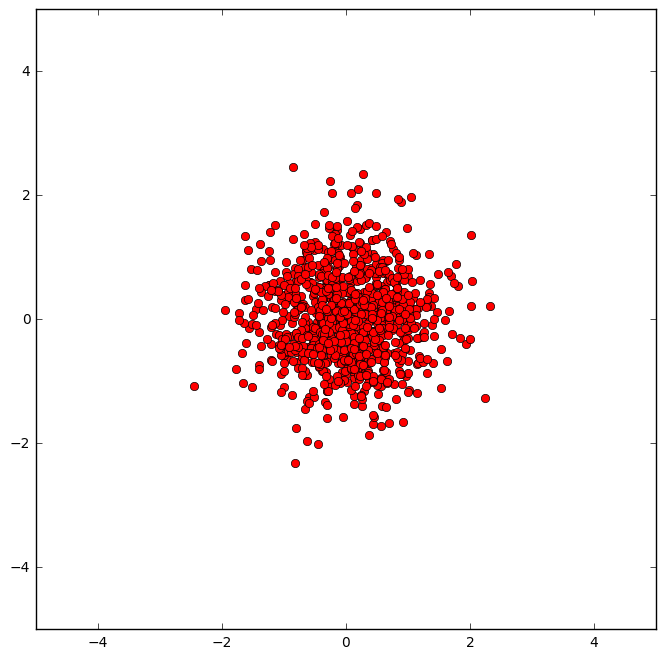

In [19]:
figure = plt.figure(figsize=(8,8))
axis('scaled')
plt.xlim(-5.,5.)
plt.ylim(-5.,5.)
plt.plot(x_config, y_config, 'ro')
plt.show()
plt.close()